# 线性代数

    线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。不像某些语言（如MATLAB），通过*对两个二维数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）：
    
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [82]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [83]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [84]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [85]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y)等价于np.dot(x, y)：

In [86]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [94]:
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [96]:
x.dot(np.ones((3,1)))

array([[ 6.],
       [15.]])

In [97]:
x.dot(np.ones(3))

array([ 6., 15.])

In [99]:
m1=np.matrix([[1,2,3]])
m1

matrix([[1, 2, 3]])

In [101]:
m2=np.matrix(np.ones(3))
m2

matrix([[1., 1., 1.]])

In [103]:
m1.dot(m2.T)

matrix([[6.]])

## numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的NumPy版本）等：

![](images/line_math.png)

> 首先，看这个矩阵是不是方阵（即行数和列数相等的矩阵，若行数和列数不相等，那就谈不上奇异矩阵和非奇异矩阵）。然后，再看此矩阵的行列式|A|是否等于0，若等于0，称矩阵A为奇异矩阵；若不等于0，称矩阵A为非奇异矩阵。 同时，由|A|≠0可知矩阵A可逆，这样可以得出另外一个重要结论:可逆矩阵就是非奇异矩阵，非奇异矩阵也是可逆矩阵。 如果A为奇异矩阵，则AX=0有无穷解，AX=b有无穷解或者无解。如果A为非奇异矩阵，则AX=0有且只有唯一零解，AX=b有唯一解。

In [4]:
import numpy.linalg as la
import numpy as np

In [5]:
np.random.seed(898)
X = np.random.randint(10,size=(4,4))
X

array([[7, 1, 7, 0],
       [4, 7, 6, 0],
       [2, 4, 8, 4],
       [0, 9, 5, 9]])

In [7]:
np.diag(X)

array([7, 7, 8, 9])

In [9]:
np.trace(X)

31

In [11]:
la.det(X)

1565.9999999999984

In [12]:
la.eig(X)

(array([18.026883  +0.j        ,  5.38376262+3.22513144j,
         5.38376262-3.22513144j,  2.20559176+0.j        ]),
 array([[ 0.35503721+0.j        , -0.44368092-0.09783593j,
         -0.44368092+0.09783593j,  0.76778991+0.j        ],
        [ 0.40186916+0.j        , -0.37397356+0.36385982j,
         -0.37397356-0.36385982j,  0.02135174+0.j        ],
        [ 0.50186923+0.j        ,  0.20094299-0.233809j  ,
          0.20094299+0.233809j  , -0.52892143+0.j        ],
        [ 0.67865825+0.j        ,  0.65290156+0.j        ,
          0.65290156-0.j        ,  0.36094998+0.j        ]]))

In [15]:
la.inv(X).dot(X)

array([[ 1.00000000e+00,  1.38777878e-17, -4.85722573e-16,
         1.24900090e-16],
       [ 5.55111512e-17,  1.00000000e+00, -6.93889390e-17,
        -1.24900090e-16],
       [ 1.11022302e-16, -4.16333634e-17,  1.00000000e+00,
        -4.16333634e-17],
       [-2.77555756e-17,  2.49800181e-16,  1.38777878e-16,
         1.00000000e+00]])

In [16]:
la.qr(X)

(array([[-0.84270097,  0.30667715,  0.01325571,  0.44229909],
        [-0.48154341, -0.41110601,  0.42752531, -0.64523631],
        [-0.24077171, -0.25115801, -0.90144561, -0.25757417],
        [-0.        , -0.82089014,  0.06664995,  0.56718353]]),
 array([[ -8.30662386,  -5.17659168, -10.71434092,  -0.96308682],
        [  0.        , -10.96370825,  -6.43361081,  -8.39264332],
        [  0.        ,   0.        ,  -4.22037327,  -3.00593286],
        [  0.        ,   0.        ,   0.        ,   4.07435511]]))

In [138]:
%timeit X.dot(inv(X))

13.3 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Solve


方程组

    2x+y=6
    
    3x+2y=8

转化为 Ax=b 结构



In [5]:
a=np.array([[2,1],[3,2]])
b=np.array([[6],[8]])

solve(a,b)

array([[ 4.],
       [-2.]])

得到的结果是x=4,y=-2

验证：

    Ax=b #A可逆
    
    A-1Ax=A-1b
    
    x=A-1b
    

In [7]:
inv_a=inv(a)
inv_a

array([[ 2., -1.],
       [-3.,  2.]])

In [12]:
inv_a.dot(b)

array([[ 4.],
       [-2.]])

### lstsq 计算Ax=b的最小二乘解

假设有四个点 (1,2),(2,4),(4,6),(6,15)

绘制如下


In [3]:
x=np.array([1,2,4,6])
y=np.array([2,4,6,15])

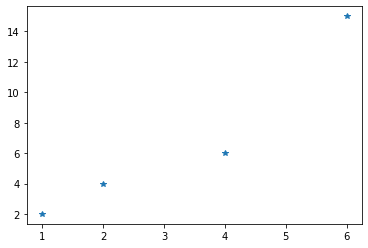

In [4]:
plt.plot(x,y,
         marker='*',
         linestyle=""
        )

### 拟合

根据 y=ax+b 转化矩阵

    a+b=2

    2a+b=4

    4a+b=6

    6a+b=15

In [18]:
A=np.array([[1,1],[2,1],[4,1],[6,1]])
b=np.array([[2],[4],[6],[15]])

In [19]:
import numpy.linalg as la

In [20]:
r=la.lstsq(A,b,rcond=-1)

In [21]:
r

(array([[ 2.45762712],
        [-1.23728814]]),
 array([9.66101695]),
 2,
 array([7.74706036, 0.99149166]))

In [22]:
a=r[0][0][0]

In [23]:
b=r[0][1][0]

In [73]:
x_=np.arange(0,10,0.1)
optimeze_y=ax+b


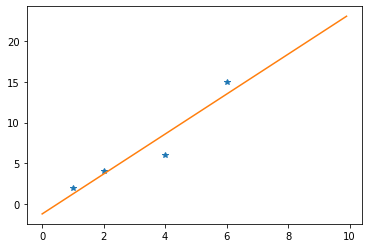

In [76]:
plt.plot(x,y,
         marker='*',
         linestyle=""
        )

plt.plot(x_,optimeze_y,
#          marker='.',
         linestyle="-"
        )